# Assignment 4

### Math 502 - Lamoureux

### Due April 4, 2019

## Exercise 0

Fix a constant $\lambda >0$. Find a solution to the delay differential equation
$$y'(x) = -\lambda y(x-1), \qquad y(0) = 1,$$
where we are looking for a function $y=y(x)$ that satisfies this equation.

Does your solution decay over time? At what rate? Do you think the decay rate is somehow related to the delay in the differential equation? (Here the delay is 1, since we have a $x-1$ in the DE.) Test your idea by solving a related equation $y'(x) = -\lambda y(x-x_0)$.


## Solution

I presented this exercise because we saw a delay differential equation (DDE) in the pantograph problem. Howison was very quick to solve it, without discussing many interesting aspects of DDEs. 

For full marks, I was happy to see people look for decaying solutions explicitly, such as
$$y(x) = e^{-cx}.$$
The DDE above results in the formula
$$-c e^{-cx} = -\lambda e^{-c(x-1)} = -\lambda e^c e^{-cx}.$$
Canceling the $e^{-cx}$ we are left with a simple equation to solve,
$$ \frac{c}{e^c} = \lambda.$$

We can plot the curve on the left to look for positive values for $\lambda$ that we can solve for.

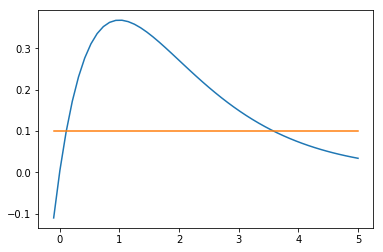

In [93]:
from numpy import *
from matplotlib.pyplot import *
c = linspace(-.1,5)
plot(c,c/exp(c), c,.1+0*c);

This function has a maximum at $c = 1$ (check with calculus) and max value of $1/e \approx 0.35$. For any $\lambda $ between 0 and $1/e$, there will be two positive values of $c$ where the equation
$$ \frac{c}{e^c} = \lambda$$
is satisfied. So our general solution is the linear combination
$$y(x) = A e^{-c_1 x} + B e^{-c_2 x},$$
where $A,B$ are arbitrary constants.

Of course we need A+B=1 to satisfy the initial condition $y(0) = 1$.

These decay constants $c_1,c_2$ will change is you replace the delay parameter in $$y'(x) = -\lambda y(x-x_0).$$
You should try this out yourself, now that you see how this is done. Note which directions the delay constants move. 

The numbers $c_1,c_2$ are the decay constants. From the graph above, looking at the intersection points, you should notice one is close to zero, and the other is big. As $\lambda$ gets close to zero, the smaller $c_i$ goes to zero, and the other goes to infinity. So that is interesting, the decay constants have different behaviour. 

(Most students did not notice the two solutions, they just picked one.)

In the case $\lambda = 1/e$, the critical value, there is a double root at $c = 1$, so the general (exponential form) solution is
$$y(x) = e^{-x} + xe^{-x}.$$

(Nobody saw this.)

A few people noticed that oscillatory solutions are possible. Yes, this is true. I gave full marks for their work numerically, or qualitatively. 

If you want more details on oscillations, you could try to solve the equation 
$$ \frac{c}{e^c} = \lambda$$
using complex values of $c$. Or you can try a direct solution of the form
$$y(x) = e^{-ax} \cos(bx).$$
In this case, the DDE $y'(x) = -\lambda y(x-1)$ gives us
$$e^{-ax}(-a\cos(bx) - b \sin(bx) ) = -\lambda e^{-a(x-1)} \cos(b(x-1)).$$
Cancelling the exponential and expanding the RHS using trig identities, we get
$$a\cos(bx) +  b \sin(bx) = \lambda e^a \{\cos(bx)\cos(b) + \sin(bx)\sin(b) \}.$$
Equating the coefficients of the $\cos(bx), \sin(bx)$ functions, we are left with two equations:
$$ a = \lambda e^a \cos(b), \qquad b = \lambda e^a \sin(b).$$
This systems can be solved numerically. The interesting point is that there are infinitely many solutions. (Given $\lambda>0$ you can find infinitely many pairs $a,b$ that solve these two equations.) To see this, divide one equation by the other to get
$$\frac{a}{b} = \frac{\cos(b)}{\sin(b)}.$$
In other words, $a = b\cot(b).$ Plugging into the first equation, we see that
$$\lambda = \frac{a}{e^a \cos(b)} = \frac{b \cot(b)}{e^{b\cot(b)}\cos(b)},$$
which simplifies to
$$\lambda  = \frac{b}{e^{b\cot(b)}\sin(b)}.$$
So as before, we have $\lambda$ expressed in the form of one paramater $b$, and we see from the plot below that there are many solutions for $b$ given any $\lambda >0$.

So yes, lots and lots of oscillatory solutions. 

/Users/mikel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/Users/mikel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


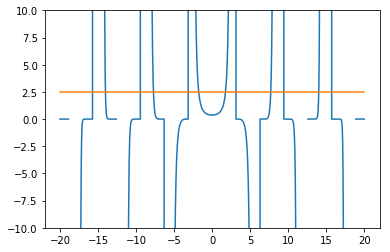

In [101]:
b = linspace(-20,20,1000)
plot(b,b/(sin(b)*exp(b/tan(b))), b,2.5+0*b);
ylim([-10,10]);

Anyhow, the interesting point it, there are many, many solutions. Turns out the DDE problem is infinite dimensional, and very challenging. If you would like to learn more, here is an interesting reference.

https://www.scribd.com/document/334488045/Delay

## Exercise 1

A sequence $a= (\ldots, a_{-2},a_{-1}, a_0, a_1, a_2, \ldots)$ is called **anti-symmetric** if $$a_{-n} = -a_n \mbox{ for all $n$. }$$
For instance, the sequence $a= (\ldots, 0,0, 1,-3,5,0,-5,3,-1,0,0,\ldots)$ is anti-symmetric, when we label the middle 0 as $a_0.$

### Part 1
- Show that the Fourier transform $\hat{a}(\theta)$ of an anti-symmetric sequence is purely imaginary (its real part is zero.)

### Solution, part 1

Note $a_{-0} = -a_0$ tells us that $2a_0 = 0$ so the zero-th coefficient is alway zero in an antisymmtrixc sequence. (Several students thought they needed to add this as an assumption.)

The proof that the FT is purely imaginary is done by adding terms in pairs. Recall
$$\hat{a}(\theta) = \sum_{n=-\infty}^\infty a_n e^{2\pi i n \theta}.$$
Add the negative and postive n-indices in pairs, $a_n, a_{-n}$, so
$$\hat{a}(\theta) = \sum_{n= 1}^\infty ( a_n e^{2\pi i n \theta} + a_{-n} e^{-2\pi i n \theta}).$$

Simplify, using the fact that $a_{-n} = -a_n,$
$$\hat{a}(\theta) = \sum_{n= 1}^\infty a_n(  e^{2\pi i n \theta} -  e^{-2\pi i n \theta}).$$
The difference of those two exponetials is a sine, times i. So
$$\hat{a}(\theta) = \sum_{n= 1}^\infty a_n(  2i\sin(2\pi n \theta) )
= 2i \sum_{n= 1}^\infty a_n\sin(2\pi n \theta),$$
which is pure imaginary.

### Part 2

- Show that $\hat{a}(1-\theta) = -\hat{a}(\theta)$ for all $\theta$ if $a$ is anti-symmetric

### Solution part 2

We use the fact that $\sin$ is 2pi periodic, and odd. So $$\sin(2\pi n - 2\pi n\theta) = \sin(- 2\pi n\theta) = - \sin(2\pi n\theta).$$
Using the formula in the last part for FT as a sum of sines, we have
$$\hat{a}(1-\theta) = 2i \sum a_n \sin(2\pi n - 2\pi n\theta) = - 2i \sum a_n \sin(2\pi n\theta) = - \hat{a}(\theta),$$
since we can take the minus sign outside the sum.

### Part 3
- Show that the convolution $a*a$ is symmetric whenever $a$ is anti-symmetric. 

### Part 3, solution

I liked the solution one student gave in words. If you flip both sequences $a$, the result of the convolution will be the flip of the regular result. But flipping $a$ introduces a minus sign. The two minus signs cancel, so the flip of the result equals the original result, hence it is symmetric. 

Or, if you prefer algebra, define $$c_n = \sum_k a_{n-k}a_k$$ as the usual convolution. Then we have by definition
$$c_{-n} = \sum_k a_{-n-k}a_k,$$
where I just replaced $n$ with $-n$ under the summation. Now $a_{-n-k} = -a{n+k}$ since a is antisymmetric, so I can replace that under the previous summation to get
$$c_{-n} = -\sum_k a_{n+k}a_k.$$
Now, the summation index goes from $-N$ to $+N$ so it doesn't hurt to sum in reverse order, so I will replace the summation index $k$ with $-k$ to get
$$c_{-n} = -\sum_k a_{n-k}a_{-k}.$$
Now use the fact that $a_{-k} = -a_k$ to change the last factor in the summation to get
$$c_{-n} = -\sum_k a_{n-k}(-a_{k}) = + \sum_k a_{n-k}a_{k} = c_n,
$$
where we recognize this last sum as our original convolution.

So $c$ is symmetric.

By the way, the same proof works for $c=a*b$, where a and b are both antisymmetric. 

What do you think happens if $a$ is symmetric and $b$ is antisymmetric? Is $c=a*b$ symmetric, antisymmetric, or possibly neither?


Hint: If you are finding this hard for general sequences $a$, try to solve it for that one example $$a= (\ldots, 0,0, 1,-3,5,0,-5,3,-1,0,0,\ldots).$$


## Exercise 2

Here's a little trick to keep convolution from making our sequences "too long."

Recall if you convolve two sequence $a,b$ of length N, the result is of length 2N-1.

To "fix" this, we can define **circular convolution**  as $c = a\otimes b$, using the formula 
$$c_k = \sum_{j=0}^{N-1} a_{k-j}b_j, \mbox{ with $k-j$ computed modulo $N$.}$$

So, for instance, the convolution of length-3 sequences is given as 
$$(a_0,a_1,a_2)\otimes (b_0,b_1,b_2) = 
(a_0b_0 + a_1b_2 + a_2b_1, a_0b_1 + a_1b_0 + a_2b_2, a_0b_2 + a_1b_1 + a_2 b_0).$$

(Notice each component on the RHS has 3 terms, and the indices in each component add up to the same number, mod 3.)

1. Compute the circular convolution: $(1,1,0,0)\otimes(1,2,3,4)$. The result should have length 4.
2. Compute the regular convolution: $(1,1,0,0) * (1,2,3,4)$. The result should have length 7. 
3. Compare your two answers. What parts are the same, what are different?
4. Compute the DFT of the three sequences $a = (1,1,0,0)$ , $b = (1,2,3,4)$, $c = (1,1,0,0)\otimes(1,2,3,4)$. Either by hand, or using Python. (Each result will be a length-4 sequence, with complex values.)
5. Verify your results in \#4, by showing that the DFT of c is equal to the product of the DFT of a times the DFT of b.

DFT = Discrete Fourier transform. It takes vectors of length N and produces vectors of length N, using that formula we saw in class.


### Solution.

This was supported to be super easy.

1. The circular convolution is $(5,3,5,7).$
2. The regular convolution is $(1,3,5,7,4,0,0).$
3. You should notice the 3,5,7, are the same, and the first number 5 in the circular is the sum of the 1,4 in the regular.
4. You can do the DFT using Python, or just note that the 4x4 matrix for the DFT in this case is the matrix
$$\left[
\begin{array}{rrrr}
1 & 1 & 1 & 1\\
1 & i & -1 & -i \\
1 & -1 & 1 & -1 \\
1 & -i & -1 & i 
\end{array}
\right].
$$
So just apply this matrix to the (column) vectors to get
$$DFT(1,1,0,0) = (2,1+i,0,1-i).$$
$$DFT(1,2,3,4) = (10,-2-2i,-2,-2+2i).$$
$$DFT(5,3,5,7) = (20,-4i,0,4i).$$
Then it is easy to check with complex multiplication that
$$(2,1+i,0,1-i)\times (10,-2-2i,-2,-2+2i)= (20,-4i,0,4i).$$



## Exercise 3

In the notes to lecture 18, we took the 2D Fourier transform of the identity matrix. As an image, this took a line pointing at 45 degrees down, and transformed it into a line at 45 degrees up.

Write some code to explore this idea further. Take a big array of zeros, and then fill in a line at some angle. Take the 2D FFT and display it -- it should look like a line, going at a different direction.

Once you get the lines working, see if you can describe the relation between the angle (or slope) of the input and output lines. 

Can you prove this relationship between the angles?



## Solution

I've tempted to use a widget here. Why not?

In [68]:
from ipywidgets import interact

In [89]:
def display1(slope=0):
    image0 = zeros((256,256))
    for i in range(-128,128):
        image0[128+round(-slope*i),128+i] = 1
#    image00 = 
    subplot(1,2,1)
    imshow(image0);
    subplot(1,2,2)
    imshow(abs(fftshift(fft2(image0))));
    
interact(display1,slope=(-.99,.99,.01));

interactive(children=(FloatSlider(value=0.0, description='slope', max=0.99, min=-0.99, step=0.01), Output()), …

To prove this, you could go with some intuition. 

When the line is horizontal, the sum
$$\hat{a}(\theta,\phi) = \sum_{j,k} a_{jk} e^{2\pi i j\theta + k\phi}$$
will only be non-zero for indicies like $a_{j0}$. So the sum reduces to $$\hat{a}(\theta,\phi) = \sum_{j} a_{j0} e^{2\pi i j\theta},$$
which means the FT is independent of the $\phi$ variable. So it looks the same as you go "up and down." In fact, the FT is s straight vertical line, which you can see when all the $a_{j0} = 1$ since in the discrete case, this complex exponentials sum up to zero (cancellation) , except at $\theta = 0$. So that's a vertical line.

What happens if you rotate the line? Well, as we saw with the widget above, the Fourier transform also rotates. The point is, it rotates in the same direction, so it keeps the perpendicular character of the line and its FT.

To see this, think of the matrix $a_{jk}$ as samples from a 2D function $f(x,y)$ that represents an image. So we might have
$$a_{jk} = f(j,k).$$
We apply a rotation matrix 
$$R = 
\left[
\begin{array}{cc} 
\cos(r) & \sin(r) \\
-\sin(r) & \cos(r) 
\end{array}
\right],$$
to get the rotated image
$$b_{jk} = f(R(j,k)'),$$
where here I mean the matrix $R$ is applied to the column vector $(j,k)$. 

Fourier transform of $b$ is given by
$$\hat{b}(\theta,\phi) = \sum_{j,k} f(R(j,k))e^{2\pi i \langle (j,k),(\theta,\phi) \rangle},$$
where this funny thing in the exponent, $\langle (j,k),(\theta,\phi) \rangle$ is just the usual inner product in 2D.

Now, lets change summation variables, to indices $(m,n) = R(j,k)$. This changes the the exponent term to have indices $(j,k)$ replaced with $(j,k) = R^{-1}(m,n)$, where here $R^{-1}$ is the inverse rotation matrix. So now the Fourier transform of $b$ becomes
$$\hat{b}(\theta,\phi) = \sum_{m,n} f(m,n)e^{2\pi i \langle R^{-1}(m,n),(\theta,\phi) \rangle}.$$
But now we pull the rotation matrix to the other side of the inner product, getting its transpose, which cancels the inverse, so
$$\hat{b}(\theta,\phi) = \sum_{m,n} f(m,n)e^{2\pi i \langle (m,n),R(\theta,\phi) \rangle}.$$

Stare at the sum for a while and you will recognize it is just FT of array a, evaluated at the point $R(\theta,\phi).$

That is,
$$\hat{b}(\theta,\phi) = \hat{a}(R(\theta,\phi)).$$

So, the point is, we rotate the image, and its Fourier transform rotates the same way. 

So when we rotate a line, its FT (which is also a line, perpendicular to the first), also rotates, keeping the same perpendicular relation.

### Student solution.

A couple of studnet mentioned a method using the FT on the 2D plane. I copy it here for your reference.

Notice that a line $y = mx$ can be described by the equation $y-mx = 0$, then a nice way to approach the problem is to consider the Fourier transform of $\delta(y-mx)$. While the $\delta$ function is infact infinite when $y = mx$ instead of $1$, it imparts the geometric intuition we might expect.

Then, taking the continuous two-dimensional Fourier transform of $\delta(y-mx)$ we have
\begin{align}
\hat{f}(u,v) &= \int_{-\infty}^\infty \int_{-\infty}^\infty \delta(y-mx) e^{-2\pi i ux}e^{-2\pi i vy} dydx\\
&= \int_{-\infty}^\infty e^{-2\pi i ux} \int_{-\infty}^\infty \delta(y-mx) e^{2\pi i vy}dydx\\
&= \int_{-\infty}^\infty e^{-2\pi i ux} \int_{-\infty}^\infty \delta(y-mx) \frac{e^{2\pi i vmx}}{e^{2\pi i vmx}}e^{2\pi i vy}dydx\\
&= \int_{-\infty}^\infty e^{-2\pi i ux - 2\pi i vmx} \int_{-\infty}^\infty \delta(y-mx) e^{-2\pi i v(y-mx)}dydx\\
&= \int_{-\infty}^\infty e^{-2\pi i x(u+vm)}dx\\
&= \delta(u+vm)
\end{align}
it follows that $\hat{f}(x,y) = \delta(x + my)$, which is nonzero if and only if $y = -(1/m)x$. 

## Exercise 4

This is an exploration exercise. 

- Take a geometric figure, place into a NxN array to create an image. 
- Its a good idea to take N to be a power of 2, like 128 or 256.
- Take the 2D FFT of the image, and save the absolute values as a NxN array.
- Plot the original image and absolute value of the FFT of the image.
- You might also try fftshift on the image (see Lecture 18 again)
- Can you see any connection between the geometric figure and its FFT?

For instance, we saw in Exercise 3 that the FFT of a line was a line.

What is the FFT of a square? A circle? A triangle? A polygon?

Try the outline of a circle, and a solid (filled in) circle. Also for the other shapes.

Try creating a pattern in the image. 
- Parallel lines
- Grid lines in x and y direction
- Rectangular array of dots 
- Hexagonal array of dots.
What does the FFT of these things look like?

**Note:** There is no right answer here, I just want you to explore some shapes and patterns. 

**Historical note:** In the early 1900s when scientists were trying to discover the atomic structure of crystals, they could essentially "see" the FFT of the arrangement of atoms in the crystal, but not see the arrangement itself. So it was an important challenge to be able to guess the arrangement only by looking at the FFT of the image. (Actually, they could only look at the absolute value of the FFT.)

The structure of DNA, a double helix, was discovered by Watson and Crick in 1953. Their work depended heavily upon  the X-ray images produced by Rosalind Franklin, which is essentially the FFT images as above. Watson and Crick received the Nobel prize in 1962; Franklin died of cancer in 1958.




## Solutions

The idea is to play around here.

The only real challenge is to figure out how to plot things in Python, that are interesting shapes. You can write your own code, or use a package like CV2.

I'll go old school and just draw using little loops. 

The idea is to set up an array as an image, and put in ones according to some pattern.

Then we use fft2 and fftshift to make the fourier transform image. 

In [43]:
from numpy import *
from matplotlib.pyplot import *
from numpy.fft import fft2, fftshift
from matplotlib import cm


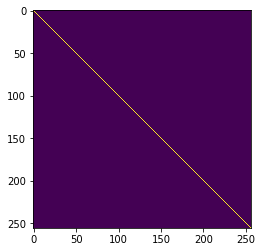

In [6]:
## A line 
image1 = zeros((256,256))
for i in range(256):
    image1[i,i] = 1
imshow(image1);

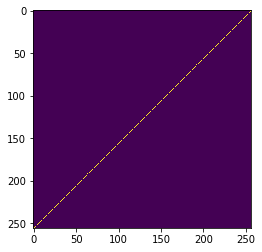

In [11]:
imshow(abs(fftshift(fft2(image1))));

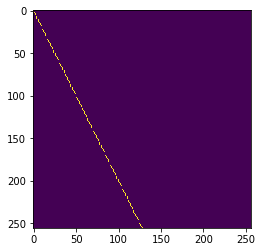

In [14]:
## A line with a different slope

slope = 2
image2 = zeros((256,256))
for i in range(256):
    image2[i,round(i/slope)] = 1
imshow(image2);

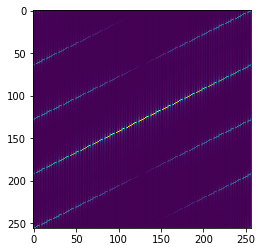

In [15]:
imshow(abs(fftshift(fft2(image2))));

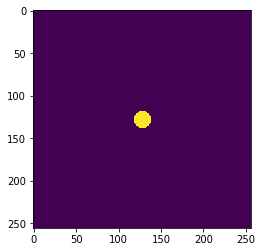

In [18]:
## A circle 
image3 = zeros((256,256))
for i in range(256):
    for j in range(256):
        if (i-128)**2 + (j-128)**2 < 10**2:
            image3[i,j] = 1
imshow(image3);

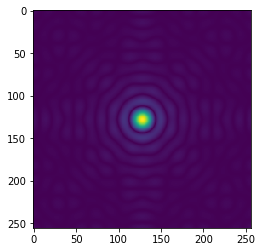

In [19]:
imshow(abs(fftshift(fft2(image3))));

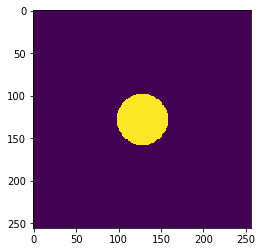

In [21]:
## A bigger circle 
image4 = zeros((256,256))
for i in range(256):
    for j in range(256):
        if (i-128)**2 + (j-128)**2 < 30**2:
            image4[i,j] = 1
imshow(image4);

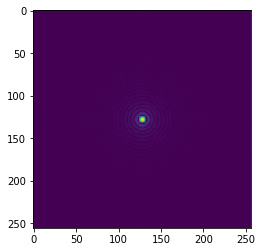

In [29]:
imshow(abs(fftshift(fft2(image4))));

Notice how the bigger circle has a smaller FFT

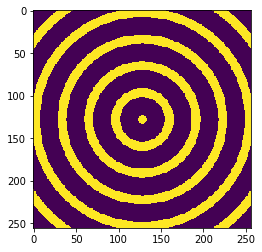

In [25]:
## A bulls eye 
image5 = zeros((256,256))
for i in range(256):
    for j in range(256):
        r = sqrt((i-128)**2 + (j-128)**2)
        if abs(sin(r/10))<.5:
            image5[i,j] = 1
imshow(image5);

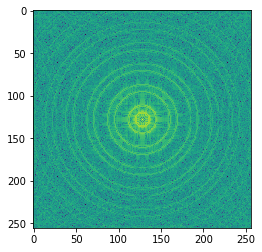

In [30]:
## Let's use a log to see more detail
imshow(log(abs(fftshift(fft2(image5)))));

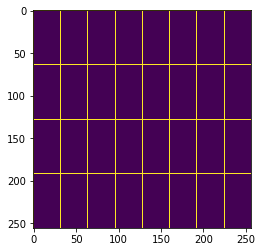

In [54]:
## Let's do a grid

image6 = zeros((256,256))
for i in range(256):
    for j in range(256):
        if (mod(i,64)==0) or (mod(j,32)==0):
            image6[i,j] = 1
imshow(image6);

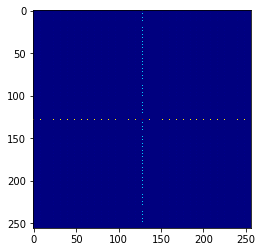

In [55]:
imshow(abs(fftshift(fft2(image6))),cmap='jet');

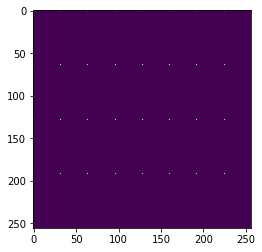

In [56]:
## Let's do a grid of points

image7 = zeros((256,256))
for i in range(256):
    for j in range(256):
        if (mod(i,64)==0) and (mod(j,32)==0):
            image7[i,j] = 1
imshow(image7);

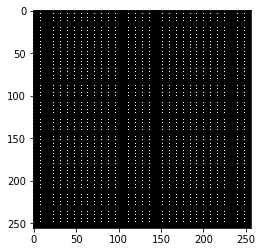

In [59]:
imshow(abs(fftshift(fft2(image7))),cmap='gray');

Notice a grid of lines maps to a pattern of points, and vice versas.

If the grid of lines is tightly spaced in the horizontal direction, then the resulting points are tightly spaced in the vertical direction. 